In [77]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# CSV 파일을 DataFrame으로 불러옵니다.
file_path = r'C:\Users\Luke\Desktop\Dart_B\Toy Project\Hotel Reservations.csv'

df=pd.read_csv(file_path)

In [79]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


> ## 1. 기초 데이터 파악

Data Dictionary

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [80]:
# info 를 통해 요약정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [81]:
# 결측치 수 확인
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

결측치는 없음.

> ### 1-1 간단한 기술통계

In [82]:
# describe 로 기술통계 확인하기
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


전체 데이터는 36,275개

In [83]:
# object 값 요약  unique: 종류, top: 최빈값, freq: 최빈값의 빈도.
df.describe(include="object")

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN36275,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


>## 2. 간단한 데이터 전처리


- 'no_of_adults'와 'no_of_children' 컬럼를 합친 'no_of_people' 컬럼과 arrival_year, arrival_month,	arrival_date 컬럼을 합친 'arrival_year_month_date'를 만들어 보려 한다. 파이썬으로도 할 수 있지만... 편의상 엑셀로 하겠습니다~

In [84]:
#편집한 .csv 파일 불러오기

file_path_new = r'C:\Users\Luke\Desktop\Dart_B\Toy Project\Hotel Reservations_new.csv'

sd=pd.read_csv(file_path_new)

In [85]:
sd.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_people,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_month,arrival_date,arrival_year_month_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,Meal Plan 1,0,Room_Type 1,224,...,10,2,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,Not Selected,0,Room_Type 1,5,...,11,6,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,Meal Plan 1,0,Room_Type 1,1,...,2,28,2018-02-28,Online,0,0,0,60.00,0,Canceled


    type_of_meal_plan과 room_type_reserved과 market_segment_type을 레이블 인코딩 처리하고, booking_status을 원-핫 인코딩 처리한다.

In [86]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Luke\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [87]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# 첫 행 제외한 부분만 추출
df_subset = sd.iloc[1:].copy()

# 1. 레이블 인코딩
# G열, I열, O열, U열에 대해 각각 레이블 인코더 생성
label_encoder_g = LabelEncoder()
label_encoder_i = LabelEncoder()
label_encoder_o = LabelEncoder()
label_encoder_u = LabelEncoder()

# 레이블 인코딩 수행
df_subset.iloc[:, 6] = label_encoder_g.fit_transform(df_subset.iloc[:, 6])  # G열 인코딩
df_subset.iloc[:, 8] = label_encoder_i.fit_transform(df_subset.iloc[:, 8])  # I열 인코딩
df_subset.iloc[:, 14] = label_encoder_o.fit_transform(df_subset.iloc[:, 14])  # O열 인코딩
df_subset.iloc[:, 20] = label_encoder_u.fit_transform(df_subset.iloc[:, 20])  # U열 인코딩

# 결과 확인
df_subset.head()



,Booking_ID,no_of_adults,no_of_children,no_of_people,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,...,arrival_month,arrival_date,arrival_year_month_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2,0,2,2,3,3,0,0,5,...,11,6,2018-11-06,4,0,0,0,106.68,1,1
2,INN00003,1,0,1,2,1,0,0,0,1,...,2,28,2018-02-28,4,0,0,0,60.00,0,0
3,INN00004,2,0,2,0,2,0,0,0,211,...,5,20,2018-05-20,4,0,0,0,100.00,0,0
4,INN00005,2,0,2,1,1,3,0,0,48,...,4,11,2018-04-11,4,0,0,0,94.50,0,0
5,INN00006,2,0,2,0,2,1,0,0,346,...,9,13,2018-09-13,4,0,0,0,115.00,1,0


In [88]:
# 각 인코더의 매핑 확인
g_mapping = dict(zip(label_encoder_g.classes_, range(len(label_encoder_g.classes_))))
i_mapping = dict(zip(label_encoder_i.classes_, range(len(label_encoder_i.classes_))))
o_mapping = dict(zip(label_encoder_o.classes_, range(len(label_encoder_o.classes_))))
u_mapping = dict(zip(label_encoder_u.classes_, range(len(label_encoder_u.classes_))))

print("G열 인코딩 매핑:", g_mapping)
print("I열 인코딩 매핑:", i_mapping)
print("G열 인코딩 매핑:", o_mapping)
print("I열 인코딩 매핑:", u_mapping)

G열 인코딩 매핑: {'Meal Plan 1': 0, 'Meal Plan 2': 1, 'Meal Plan 3': 2, 'Not Selected': 3}
I열 인코딩 매핑: {'Room_Type 1': 0, 'Room_Type 2': 1, 'Room_Type 3': 2, 'Room_Type 4': 3, 'Room_Type 5': 4, 'Room_Type 6': 5, 'Room_Type 7': 6}
G열 인코딩 매핑: {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Offline': 3, 'Online': 4}
I열 인코딩 매핑: {'Canceled': 0, 'Not_Canceled': 1}


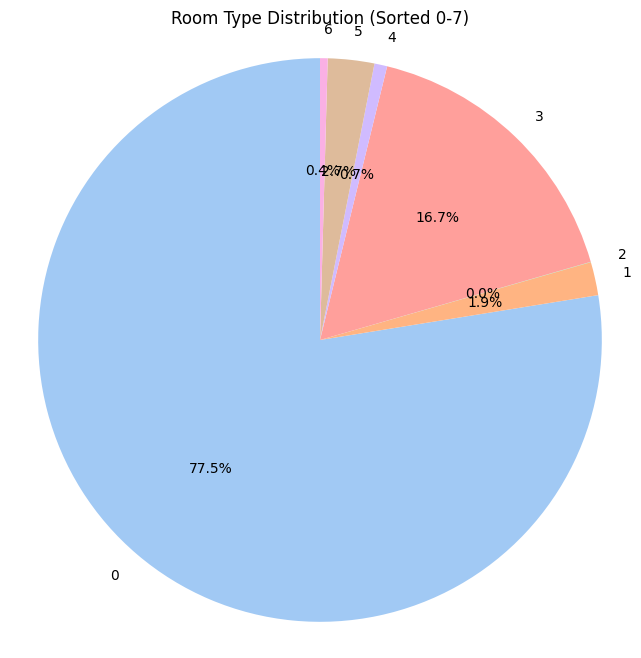

In [89]:
# room_type_reserved 열의 값의 분포를 계산하고, 인덱스를 0부터 7까지의 순서로 정렬
room_type_counts = df_subset['room_type_reserved'].value_counts().sort_index()

# 파이 차트 그리기 (0부터 7까지 순서대로 나타나도록 함)
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Room Type Distribution (Sorted 0-7)')
plt.axis('equal')  # 파이 차트를 원형으로 만듦
plt.show()

- Room Type 1이 전체 예약의 77.5%(28160개의 예약)로 압도적
- 잘 보이지는 않지만 
  - Room Type 3은 7개의 예약
  - Room Type 5는 265개의 예약
  - Room Type 7은 158개의 예약
  
  이 있다.


> ## 가설설정

>> 예약한 기간(lead_time) 값이 클수록 저렴?

> #아쉬운 점: Offline 예약 경로가 잘 설명되지 않아있어 방문 예약인지, 전화 예약인지, 우편 예약인지 알기가 어려웠다.